In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
traindf = pd.read_csv('fashion-mnist_train.csv')
testdf = pd.read_csv('fashion-mnist_test.csv')

print(traindf.shape, testdf.shape)

(942, 785) (1416, 785)


In [ ]:
X = traindf.iloc[:, 1:].values
y = traindf.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svm = SVC(kernel='linear')

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C value: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

svm_best = SVC(kernel='linear', C=best_C)
svm_best.fit(X_train, y_train)

test_accuracy = svm_best.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 197, in fit
    X, y = validate_data(
           ^^^

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

svm_poly = SVC(kernel='poly')

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4]}
grid_search = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_degree = grid_search.best_params_['degree']

best_score = grid_search.best_score_

print(f"Best C value: {best_C}")
print(f"Best degree: {best_degree}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

svm_poly_best = SVC(kernel='poly', C=best_C, degree=best_degree)
svm_poly_best.fit(X_train, y_train)

test_accuracy = svm_poly_best.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

In [ ]:

svm_rbf = SVC(kernel='rbf')

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

best_score = grid_search.best_score_

print(f"Best C value: {best_C}")
print(f"Best gamma: {best_gamma}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

svm_rbf_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_best.fit(X_train, y_train)

test_accuracy = svm_rbf_best.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images for SVM
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Check shape
print(f"Training data shape: {X_train_flat.shape}")
print(f"Test data shape: {X_test_flat.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


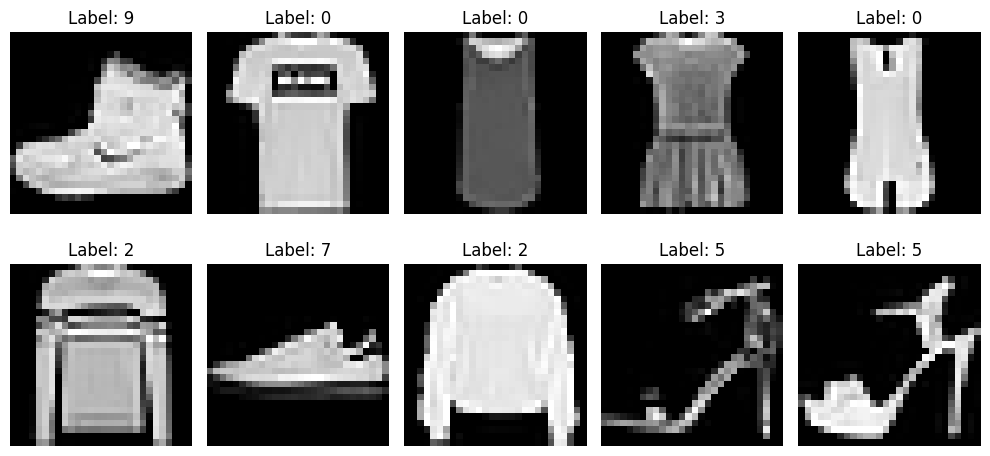

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
linear_params = {'C': [0.1, 1, 10, 100]}
linear_svm = GridSearchCV(SVC(kernel='linear'), linear_params, cv=3, scoring='accuracy')
linear_svm.fit(X_train_scaled[:10000], y_train[:10000])

print("Best Linear Kernel Params:", linear_svm.best_params_)
print("Best Linear Kernel Accuracy:", linear_svm.best_score_)

Best Linear Kernel Params: {'C': 0.1}
Best Linear Kernel Accuracy: 0.8252000964943526


In [ ]:
poly_params = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
poly_svm = GridSearchCV(SVC(kernel='poly'), poly_params, cv=3, scoring='accuracy')
poly_svm.fit(X_train_scaled[:8000], y_train[:8000])

print("Best Polynomial Kernel Params:", poly_svm.best_params_)
print("Best Polynomial Kernel Accuracy:", poly_svm.best_score_)


In [ ]:
rbf_params = {'C': [1, 10], 'gamma': [0.01, 0.1, 1]}
rbf_svm = GridSearchCV(SVC(kernel='rbf'), rbf_params, cv=3, scoring='accuracy')
rbf_svm.fit(X_train_scaled[:8000], y_train[:8000])

print("Best RBF Kernel Params:", rbf_svm.best_params_)
print("Best RBF Kernel Accuracy:", rbf_svm.best_score_)


In [ ]:
# Predict with best models
linear_pred = linear_svm.best_estimator_.predict(X_test_scaled)
poly_pred = poly_svm.best_estimator_.predict(X_test_scaled)
rbf_pred = rbf_svm.best_estimator_.predict(X_test_scaled)

# Accuracy
print("Linear Kernel Test Accuracy:", accuracy_score(y_test, linear_pred))
print("Polynomial Kernel Test Accuracy:", accuracy_score(y_test, poly_pred))
print("RBF Kernel Test Accuracy:", accuracy_score(y_test, rbf_pred))


In [ ]:
cm = confusion_matrix(y_test, rbf_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gemini

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images for SVM
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Check shape
print(f"Training data shape: {X_train_flat.shape}")
print(f"Test data shape: {X_test_flat.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
# Linear Kernel
linear_params = {'C': [0.1, 1, 10, 100]}
linear_svm = GridSearchCV(SVC(kernel='linear'), linear_params, cv=3, scoring='accuracy')
linear_svm.fit(X_train_scaled[:10000], y_train[:10000]) # Using a subset for faster training

print("Best Linear Kernel Params:", linear_svm.best_params_)
print("Best Linear Kernel Accuracy:", linear_svm.best_score_)

# Polynomial Kernel
poly_params = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
poly_svm = GridSearchCV(SVC(kernel='poly'), poly_params, cv=3, scoring='accuracy')
poly_svm.fit(X_train_scaled[:8000], y_train[:8000]) # Using a subset for faster training

print("Best Polynomial Kernel Params:", poly_svm.best_params_)
print("Best Polynomial Kernel Accuracy:", poly_svm.best_score_)

# RBF Kernel
rbf_params = {'C': [1, 10], 'gamma': [0.01, 0.1, 1]}
rbf_svm = GridSearchCV(SVC(kernel='rbf'), rbf_params, cv=3, scoring='accuracy')
rbf_svm.fit(X_train_scaled[:8000], y_train[:8000]) # Using a subset for faster training

print("Best RBF Kernel Params:", rbf_svm.best_params_)
print("Best RBF Kernel Accuracy:", rbf_svm.best_score_)

# Predict with best models
linear_pred = linear_svm.best_estimator_.predict(X_test_scaled)
poly_pred = poly_svm.best_estimator_.predict(X_test_scaled)
rbf_pred = rbf_svm.best_estimator_.predict(X_test_scaled)

# Accuracy
print("Linear Kernel Test Accuracy:", accuracy_score(y_test, linear_pred))
print("Polynomial Kernel Test Accuracy:", accuracy_score(y_test, poly_pred))
print("RBF Kernel Test Accuracy:", accuracy_score(y_test, rbf_pred))

Best Linear Kernel Params: {'C': 0.1}
Best Linear Kernel Accuracy: 0.8252000964943526
Best Polynomial Kernel Params: {'C': 10, 'degree': 2}
Best Polynomial Kernel Accuracy: 0.8564993704369099
Best RBF Kernel Params: {'C': 10, 'gamma': 0.01}
Best RBF Kernel Accuracy: 0.7206250850301626
Linear Kernel Test Accuracy: 0.8218
Polynomial Kernel Test Accuracy: 0.8573
RBF Kernel Test Accuracy: 0.7278


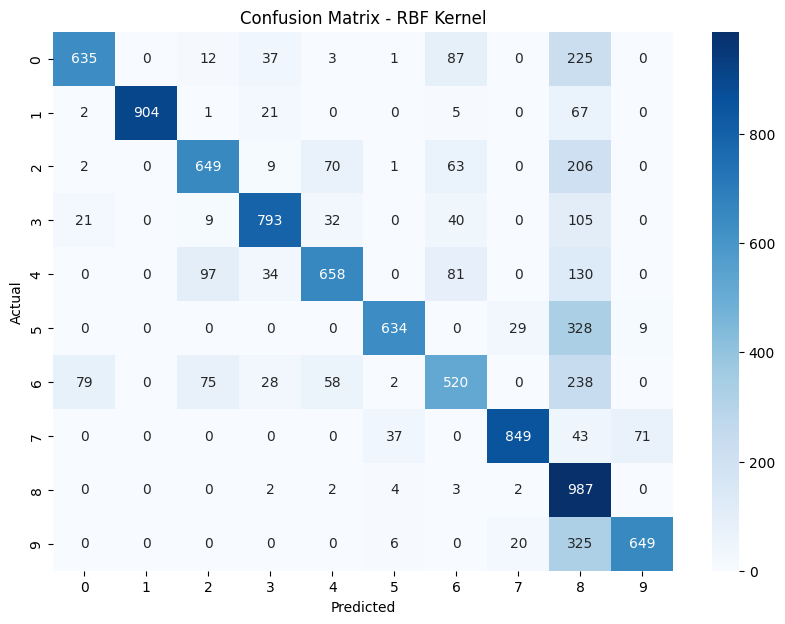

In [ ]:
# Confusion Matrix for RBF Kernel (Example)
cm = confusion_matrix(y_test, rbf_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Reports
print("Linear Kernel Classification Report:")
print(classification_report(y_test, linear_pred))

print("Polynomial Kernel Classification Report:")
print(classification_report(y_test, poly_pred))

print("RBF Kernel Classification Report:")
print(classification_report(y_test, rbf_pred))

# Best Values
print("\nBest Values:")
print("Linear Kernel:", linear_svm.best_params_)
print("Polynomial Kernel:", poly_svm.best_params_)
print("RBF Kernel:", rbf_svm.best_params_)

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.97      0.96      0.96      1000
           2       0.66      0.74      0.70      1000
           3       0.83      0.81      0.82      1000
           4       0.73      0.74      0.74      1000
           5       0.92      0.90      0.91      1000
           6       0.58      0.51      0.54      1000
           7       0.89      0.92      0.91      1000
           8       0.95      0.92      0.94      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.98      0.96      0.97      1000


In [ ]:
# Accuracy
print("Linear Kernel Test Accuracy:", accuracy_score(y_test, linear_pred))
print("Polynomial Kernel Test Accuracy:", accuracy_score(y_test, poly_pred))
print("RBF Kernel Test Accuracy:", accuracy_score(y_test, rbf_pred))

# Best Accuracy Scores
print("\nBest Accuracy Scores:")
print("Linear Kernel:", linear_svm.best_score_)
print("Polynomial Kernel:", poly_svm.best_score_)
print("RBF Kernel:", rbf_svm.best_score_)

Linear Kernel Test Accuracy: 0.8218
Polynomial Kernel Test Accuracy: 0.8573
RBF Kernel Test Accuracy: 0.7278

Best Accuracy Scores:
Linear Kernel: 0.8252000964943526
Polynomial Kernel: 0.8564993704369099
RBF Kernel: 0.7206250850301626
